# Multi class classification

In [1]:
# Imports
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor, Lambda
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader

# Load data

In [2]:
# Datasets
train_data = FashionMNIST('./Data', download=True, train=True, 
                          transform=ToTensor())

test_data  = FashionMNIST('./Data', download=True, train=False, 
                          transform=ToTensor())

# Dataloaders
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data , batch_size=64, shuffle=True)


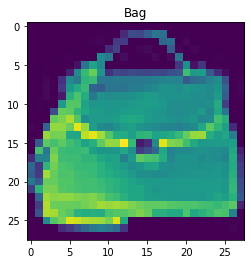

In [3]:
# Sanity check
X, y = next(iter(train_loader))
plt.imshow(X[0,0])
_ = plt.title(train_data.classes[y[0]])

# Check GPU availability

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

Using cpu device


# Network class

In [9]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        # Input: 28*28 image
        # Output 10 classes
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
    def forward(self,x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))

        return x

# Train, test functions

In [10]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    n_batch = int(np.floor(size/dataloader.batch_size))
    for i_batch, (X, y) in enumerate(dataloader):
        X = X.to(device)
        y = y.to(device)
        logits = model(X)
        loss = loss_fn(logits,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if not(i_batch % int(n_batch/5)):
            print(f'batch: [{i_batch}/{n_batch}], loss: {loss:.2e}')
            
# def test_loop
def test_loop(dataloader,model,loss_fn):
    size = len(dataloader.dataset)
    accuracy, loss = 0, 0
    with torch.no_grad():
        for i_batch, (X,y) in enumerate(dataloader):
            X = X.to(device)
            y = y.to(device)

            logits = model(X)
            y_pred = logits.argmax(1)
            loss += loss_fn(logits,y).item()
            accuracy += (y_pred==y).sum().item()

    loss/=size
    accuracy/=size
    print(f"accuracy: {accuracy:.2e}, loss:{loss:.2e}")
        

# Run

In [11]:
n_epoch = 20
net = NeuralNetwork().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)

In [12]:
for epoch in range(n_epoch):
    print(f"\nEpoch {epoch} =============")
    train_loop(train_loader, net, loss_fn, optimizer)
    test_loop(test_loader, net, loss_fn)



Epoch 0 =============
batch: [0/937], loss: 2.30e+00
batch: [187/937], loss: 1.25e+00
batch: [374/937], loss: 1.34e+00
batch: [561/937], loss: 1.12e+00
batch: [748/937], loss: 1.14e+00
batch: [935/937], loss: 1.20e+00
accuracy: 4.98e-01, loss:2.07e-02

Epoch 1 =============
batch: [0/937], loss: 1.51e+00
batch: [187/937], loss: 1.26e+00
batch: [374/937], loss: 1.19e+00
batch: [561/937], loss: 1.06e+00
batch: [748/937], loss: 1.15e+00
batch: [935/937], loss: 9.72e-01
accuracy: 5.29e-01, loss:1.92e-02

Epoch 2 =============
batch: [0/937], loss: 1.06e+00
batch: [187/937], loss: 1.31e+00
batch: [374/937], loss: 1.08e+00
batch: [561/937], loss: 1.32e+00
batch: [748/937], loss: 1.15e+00
batch: [935/937], loss: 1.28e+00
accuracy: 5.27e-01, loss:1.91e-02

Epoch 3 =============
batch: [0/937], loss: 1.07e+00
batch: [187/937], loss: 1.11e+00
batch: [374/937], loss: 9.92e-01
batch: [561/937], loss: 8.73e-01
batch: [748/937], loss: 1.33e+00
batch: [935/937], loss: 1.08e+00
accuracy: 5.37e-01, lo